In [4]:
!pip install pyarrow

     |████████████████████████████████| 24.0 MB 2.4 MB/s eta 0:00:01


In [2]:
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet', engine='pyarrow') 

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [6]:
df.shape

(2463931, 19)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [5]:
df['total_amount'].max()

401095.62

In [8]:
df['tpep_pickup_datetime']

0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: tpep_pickup_datetime, Length: 2463931, dtype: datetime64[ns]

In [34]:
from datetime import datetime

df['tpep_pickup_datetime'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].astype('|S')

In [40]:
print(df['tpep_pickup_datetime'].str.contains("2008").sum())
print(df['tpep_pickup_datetime'].str.contains("2009").sum())

0
8


In [41]:
df = df[~df['tpep_pickup_datetime'].str.contains("2009", na=False, case=False)]
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])

In [42]:
df['tpep_pickup_datetime']

0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: tpep_pickup_datetime, Length: 2463917, dtype: datetime64[ns]

총 비용 중 너무 튀는 값이 있어서 삭제함 

In [46]:
df['total_amount'].max()

401095.62

In [47]:
df = df[df.total_amount != df.total_amount.max()]

In [48]:
df['total_amount'].max()

899.68

<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='total_amount'>

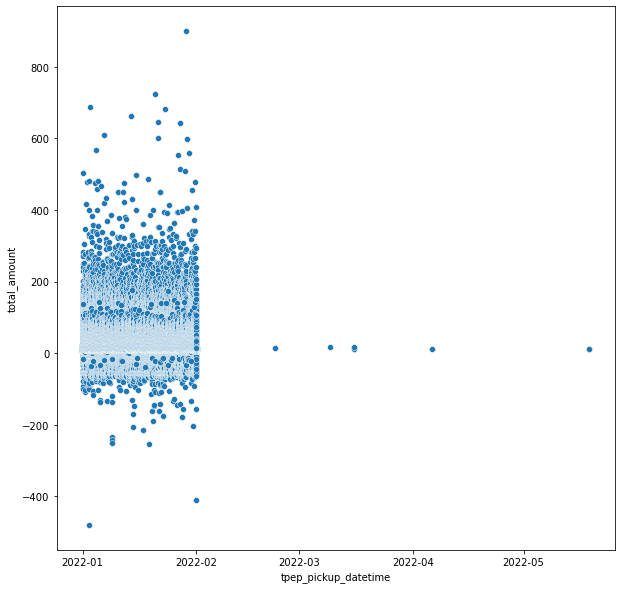

In [49]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df, x='tpep_pickup_datetime', y = 'total_amount')

# 2022년 데이터만 가지고 해도 너무 많아서 1월 데이터만 시각화 함

In [53]:
from datetime import datetime

df['tpep_pickup_datetime'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].astype('|S')

In [54]:
df = df[df['tpep_pickup_datetime'].str.contains("2022-01-01", na=False, case=False)]
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])

<AxesSubplot:xlabel='tpep_pickup_datetime', ylabel='total_amount'>

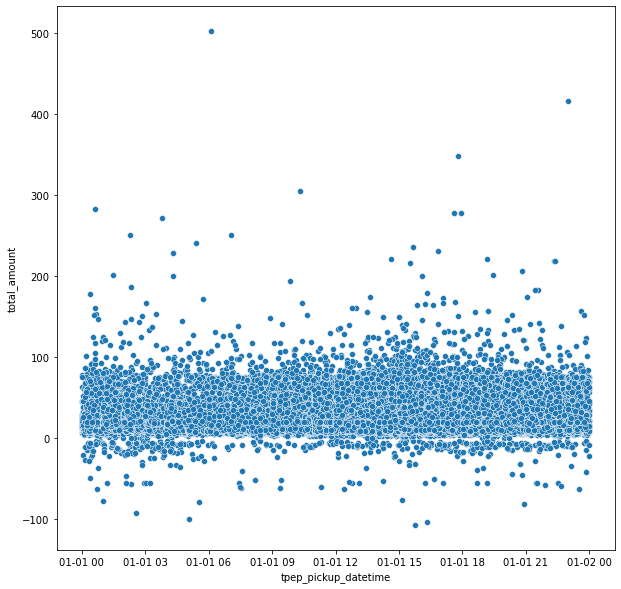

In [55]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df, x='tpep_pickup_datetime', y = 'total_amount')

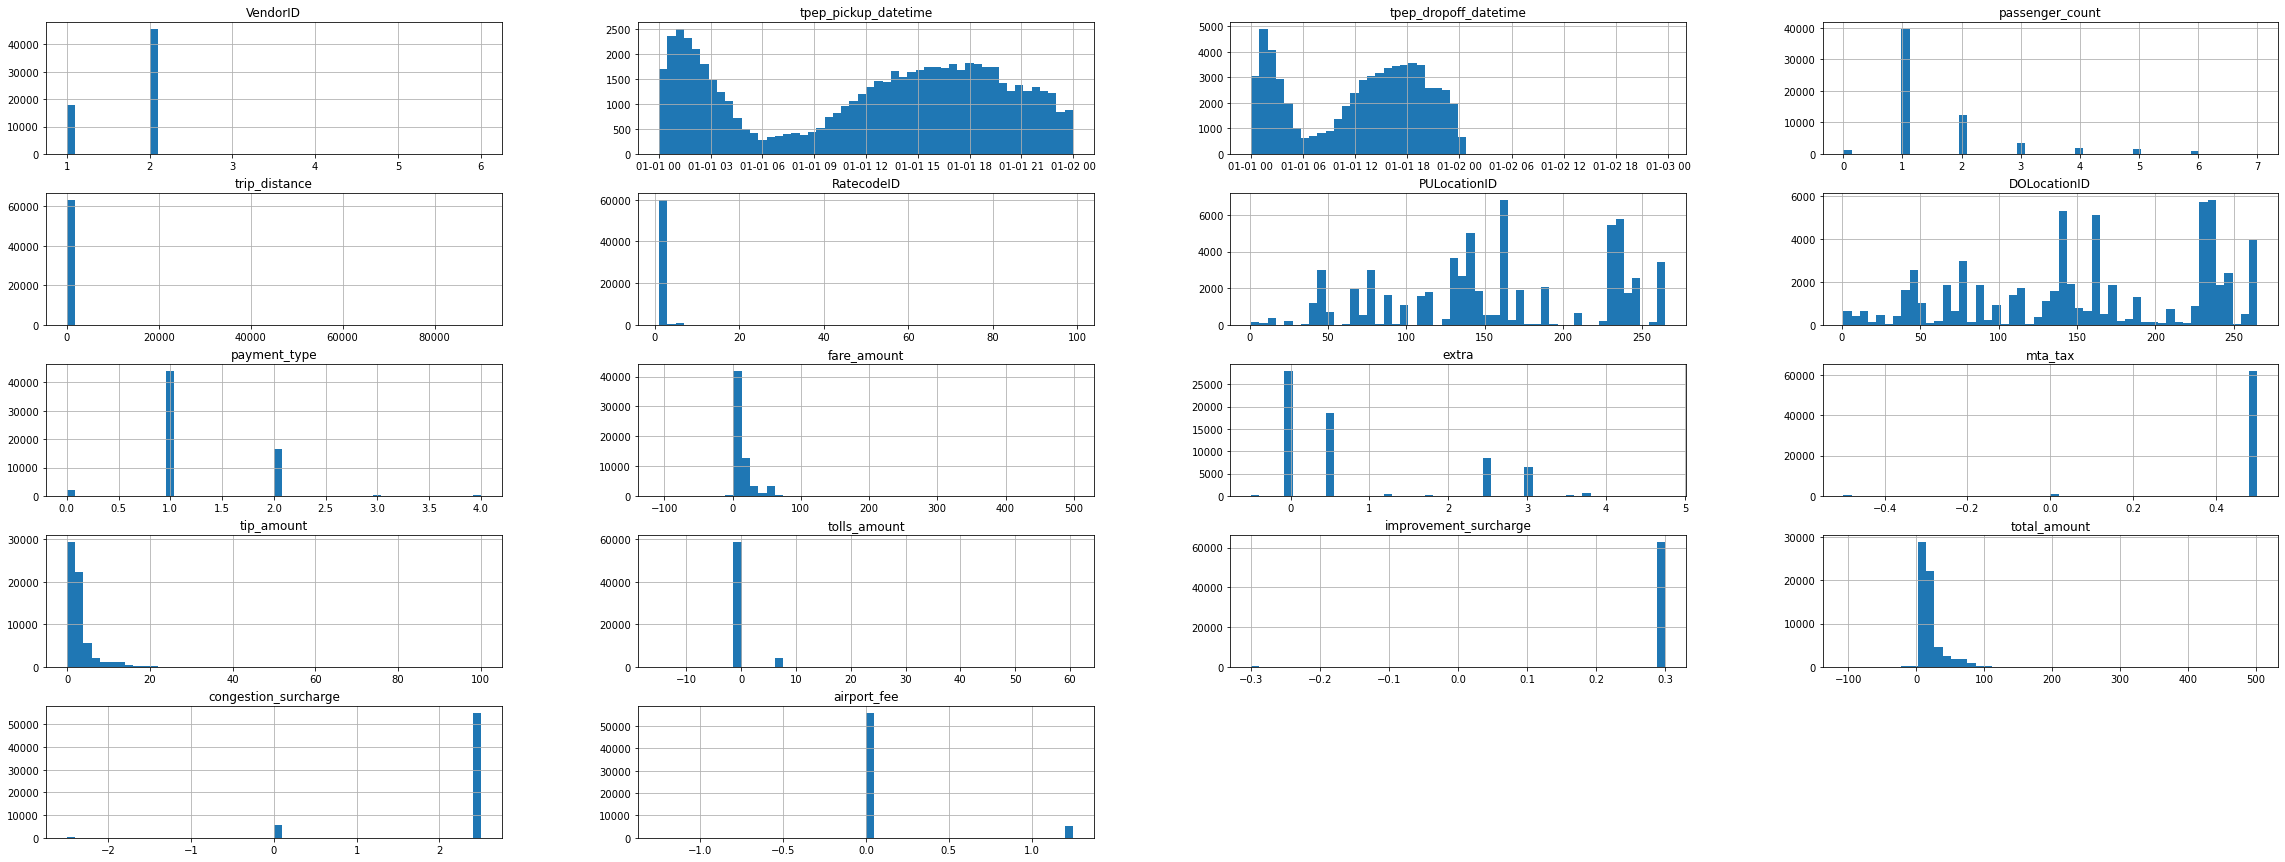

In [59]:
# 히스토그램
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins = 50, figsize = (40,15))
plt.show()

<AxesSubplot:>

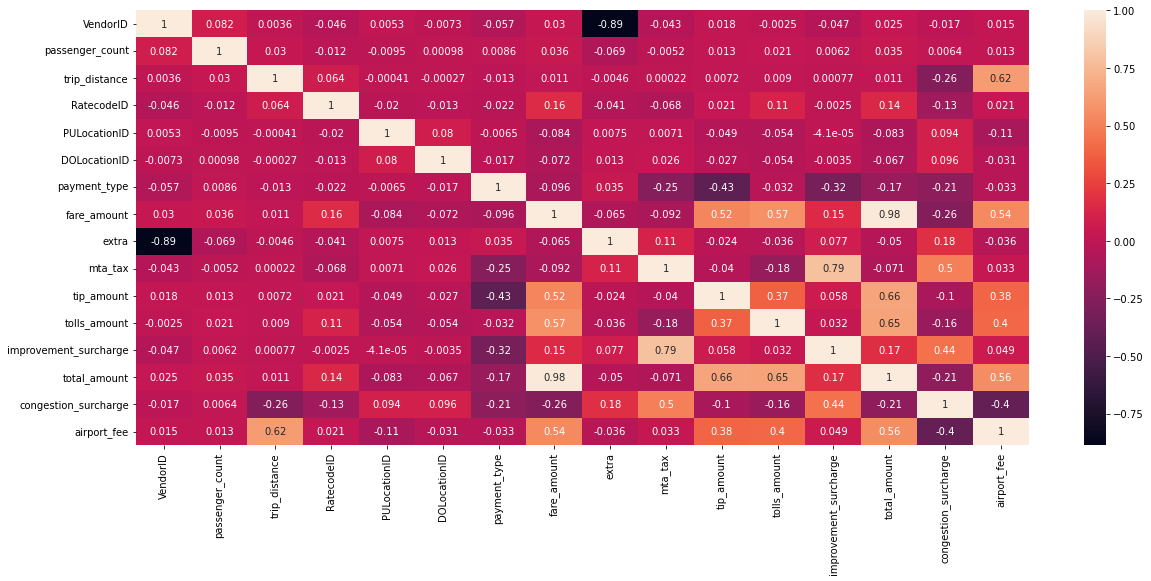

In [58]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True)